# DATA CLEANSING WITH TELCO

In [115]:
#import library
import pandas as pd 

#import dataset
df_load = pd.read_csv('/Users/sugengw07/Documents/PYTHON/DQLAB/DATASET/dqlab_telco.csv')

#Tampilkan jumlah baris dan kolom
print(df_load.shape)

#Tampilkan 5 data teratas
print(df_load.head())

#Jumlah ID yang unik
print(df_load['customerID'].nunique())

(7113, 22)
   UpdatedAt   customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     202006  45759018157  Female              0     Yes         No     1.0   
1     202006  45557574145    Male              0      No         No    34.0   
2     202006  45366876421    Male              0      No         No     2.0   
3     202006  45779536532    Male              0      No         No    45.0   
4     202006  45923787906  Female              0      No         No     2.0   

  PhoneService     MultipleLines InternetService  ... DeviceProtection  \
0           No  No phone service             DSL  ...               No   
1          Yes                No             DSL  ...              Yes   
2          Yes                No             DSL  ...               No   
3           No  No phone service             DSL  ...              Yes   
4          Yes                No     Fiber optic  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBi

Memfilter ID Number Pelanggan Format Tertentu
Mencari format ID Number (Phone Number) Pelanggan customerID yang benar, dengan kriteria:

Panjang karakter adalah 11-12.
Terdiri dari Angka Saja, tidak diperbolehkan ada karakter selain angka
Diawali dengan angka 45 2 digit pertama.
 
Gunakan fungsi count() untuk menghitung banyaknya rows Customer ID, anda juga bisa menggunakan str.match() & regex untuk mencocokan dengan kriteria diatas. Jangan lupa gunakan astype() untuk merubah tipe datanya yang semula numeric

Notes : Buat kolom bantuan baru dengan nama `valid_id`

Hasil yang diharapkan adalah sebagai berikut.

Hasil jumlah ID Customer yang terfilter adalah 7006

In [116]:
df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis = 1)
print('Hasil jumlah ID Customer yang terfilter adalah',df_load['customerID'].count())

Hasil jumlah ID Customer yang terfilter adalah 7006


In [117]:
df_load = df_load.drop_duplicates().sort_values(by='UpdatedAt')
print('Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah',df_load['customerID'].count())

Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah 6999


In [118]:
df_load

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7048,202005,45877978431,Male,1,No,No,1.0,No,No phone service,DSL,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,80.65,No
7044,202005,45819132957,Female,0,No,No,52.0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,Yes
7045,202005,45995925610,Male,0,No,Yes,71.0,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),106.70,7702.25,No
7046,202005,45419036262,Female,0,Yes,Yes,10.0,Yes,No,DSL,...,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),60.20,528.35,Yes
7047,202005,45418334682,Female,0,No,No,21.0,Yes,No,Fiber optic,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,180.05,1862.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2359,202006,45261666061,Male,0,Yes,No,33.0,Yes,Yes,DSL,...,Yes,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),72.75,2447.45,No
2358,202006,45697441629,Female,0,Yes,No,55.0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,19.70,1140.05,No
2357,202006,45925124954,Female,0,Yes,No,67.0,Yes,Yes,DSL,...,Yes,No,No,Yes,One year,No,Mailed check,75.10,5064.45,No
2368,202006,45665022680,Female,0,Yes,No,72.0,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),117.15,8529.50,No


In [119]:
df_load = df_load.drop_duplicates()
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates(subset='customerID')
print('Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah',df_load['customerID'].count())

Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah 6993


In [120]:
print('Total missing values data dari kolom Churn',df_load['Churn'].isnull().sum())
# Dropping all Rows with spesific column
df_load.dropna(subset=(['Churn']),inplace=True)
print('Total Rows dan kolom Data setelah dihapus data Missing Values adalah',(df_load).shape)


Total missing values data dari kolom Churn 43
Total Rows dan kolom Data setelah dihapus data Missing Values adalah (6950, 22)


In [121]:
df_load.dtypes

UpdatedAt             int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [122]:
print('Status Missing Value :',df_load.isnull().values.any())
print('\nJumlah Missing Values masing-masing kolom, adalah:\n',df_load.isnull().sum().sort_values(ascending = False))
#handling missing values Tenure fill with 11
df_load['tenure'].fillna(11, inplace=True)

#Loop
#Handling missing values num vars (except Tenure)
for col_name in list(['MonthlyCharges','TotalCharges']):
  #write your command here
  df_load[col_name] = df_load[col_name].fillna(df_load[col_name].mean(), inplace=True)
  print('\nJumlah Missing Values setelah di imputer datanya, adalah:')
  print(df_load[col_name].isnull().sum().sort_values(ascending=False))

Status Missing Value : True

Jumlah Missing Values masing-masing kolom, adalah:
 tenure              99
MonthlyCharges      26
TotalCharges        15
Churn                0
InternetService      0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
PhoneService         0
MultipleLines        0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
UpdatedAt            0
dtype: int64

Jumlah Missing Values setelah di imputer datanya, adalah:


AttributeError: 'numpy.int64' object has no attribute 'sort_values'


Persebaran data sebelum ditangani Outlier: 
            tenure  TotalCharges
count  6950.000000   6935.000000
mean     32.477266   2307.039265
std      25.188910   2581.095419
min       0.000000     19.000000
25%       9.000000    404.975000
50%      29.000000   1400.850000
75%      55.000000   3807.675000
max     500.000000  80000.000000


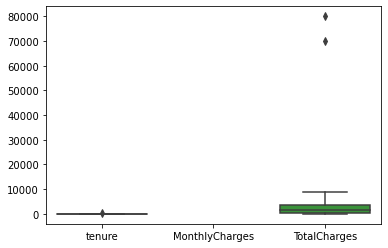

In [127]:
print('\nPersebaran data sebelum ditangani Outlier: ')
print(df_load[['tenure','MonthlyCharges','TotalCharges']].describe())

# Creating Box Plot
import matplotlib.pyplot as plt
import seaborn as sns

#Your Codes here
sns.boxplot(data = df_load[['tenure','MonthlyCharges','TotalCharges']]);

In [126]:
df_load

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3551,202006,45759487838,Female,0,No,Yes,1.0,Yes,No,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,None,79.60,Yes
8,202006,45789265516,Female,0,Yes,No,28.0,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,None,3046.05,Yes
29,202006,45877388655,Female,0,No,Yes,17.0,Yes,No,DSL,...,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,None,1093.10,Yes
28,202006,45524847904,Male,0,Yes,No,72.0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),None,6369.45,No
26,202006,45646738652,Male,0,Yes,Yes,47.0,Yes,Yes,Fiber optic,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,None,4749.15,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7041,202006,45836120314,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Mailed check,None,306.60,Yes
7042,202006,45318610951,Male,0,No,No,66.0,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),None,6844.50,No
7033,202006,45976766253,Male,0,No,No,38.0,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),None,2625.25,No
7032,202006,45689426824,Male,1,No,No,1.0,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,None,75.75,Yes
